# Feature Selection and Dimension Reduction

* Beginners Guide To Dimension Reduction Techniques: https://www.analyticsvidhya.com/blog/2015/07/dimension-reduction-methods/
* Feature Selection For Machine Learning in Python: https://machinelearningmastery.com/feature-selection-machine-learning-python/
* The Ultimate Guide to 12 Dimensionality Reduction Techniques: https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
* PCA using Python (scikit-learn): https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


In [1]:
%matplotlib inline
import numpy as np              
import pandas as pd
import seaborn as sns

<Axes: xlabel='total_bill', ylabel='tip'>

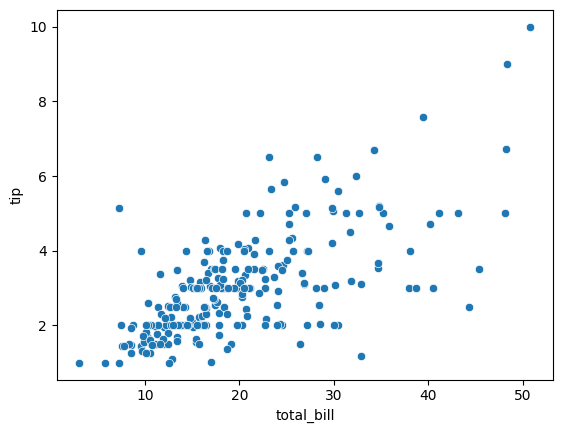

In [2]:
# Projection from 2-D space to 1-D space
tips = sns.load_dataset("tips")
sns.scatterplot(data=tips, x="total_bill", y="tip")

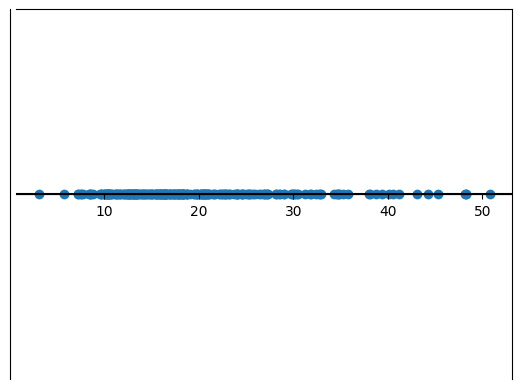

In [24]:
import matplotlib.pyplot as plt
ar = tips['total_bill']
ax = plt.axes()
ax.spines.left.set_position('zero')
ax.spines.bottom.set_position('zero')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# ax.spines['left'].set_color('none')
plt.scatter(x=ar, y=[0] * len(ar))
plt.axhline(y = 0, color='Black', linestyle='-')
plt.tick_params(axis='both', left=False, top=False, right=False, bottom=True, labelleft=False, labeltop=False, labelright=False, labelbottom=True)
plt.show()

In [5]:
df = pd.read_csv("diabetes.csv")
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0


In [6]:
df.corr()

,id,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip
id,1.000000,0.059243,0.009315,0.059255,-0.034094,0.010378,-0.011083,-0.036948,-0.018658,0.013715,0.084001,-0.008123,0.048658
chol,0.059243,1.000000,0.150092,0.186581,0.475521,0.247099,0.233119,-0.058858,0.066889,0.203344,0.171605,0.124489,0.079402
stab.glu,0.009315,0.150092,1.000000,-0.161899,0.280349,0.749236,0.289258,0.090669,0.185453,0.166467,0.022014,0.218446,0.133502
hdl,0.059255,0.186581,-0.161899,1.000000,-0.686907,-0.149145,0.038088,-0.101419,-0.290983,0.019804,0.065732,-0.268369,-0.210060
ratio,-0.034094,0.475521,0.280349,-0.686907,1.000000,0.328665,0.148510,0.094335,0.281649,0.119386,0.048193,0.304162,0.194622
glyhb,0.010378,0.247099,0.749236,-0.149145,0.328665,1.000000,0.338929,0.063023,0.171882,0.197936,0.032375,0.226184,0.141401
age,-0.011083,0.233119,0.289258,0.038088,0.148510,0.338929,1.000000,-0.090493,-0.055970,0.443041,0.058227,0.149645,0.008819
height,-0.036948,-0.058858,0.090669,-0.101419,0.094335,0.063023,-0.090493,1.000000,0.251251,-0.047827,0.038598,0.051094,-0.107832
weight,-0.018658,0.066889,0.185453,-0.290983,0.281649,0.171882,-0.055970,0.251251,1.000000,0.090873,0.175956,0.849855,0.829115
bp.1s,0.013715,0.203344,0.166467,0.019804,0.119386,0.197936,0.443041,-0.047827,0.090873,1.000000,0.596557,0.196489,0.136655


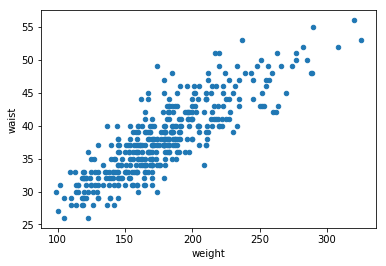

In [2]:

df.plot.scatter(x='weight', y='waist')

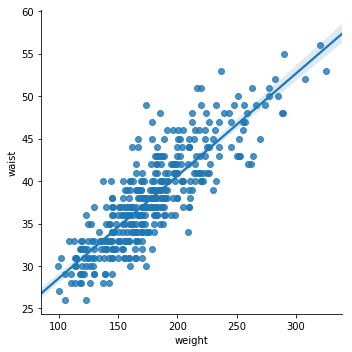

In [3]:
import seaborn as sns
sns.lmplot(x='weight',y='waist',data=df,fit_reg=True) 

## Missing Values

In [4]:
df = pd.read_csv("diabetes_missing_vals.csv")

# Let's look at how many missing values we have in our dataset
df.isnull().sum() 

id                  0
chol                1
stab.glu            0
hdl                 1
ratio               1
glyhb              13
location            0
age                 0
gender              0
height              5
weight              1
frame              12
bp.1s             382
bp.1d             382
waist               2
hip                 2
wellness_score      0
dtype: int64

In [7]:
# Looking at the shape of our dataframe will allow us to see a total number of records
df.shape

(403, 16)

In [8]:
# Calculate the percentage of missing values
df.isnull().sum() / df.shape[0]

id          0.000000
chol        0.002481
stab.glu    0.000000
hdl         0.002481
ratio       0.002481
glyhb       0.032258
location    0.000000
age         0.000000
gender      0.000000
height      0.012407
weight      0.002481
frame       0.029777
bp.1s       0.012407
bp.1d       0.012407
waist       0.004963
hip         0.004963
dtype: float64

## Low Variance
* A constant variable (all observations have same value)
* It cannot improve the power of model it has zero variance. 
* We should drop variables that have low variance compared to others because these variables will not explain the variation in response variables.


In [11]:
df.std()

id          11881.122124
chol           44.445557
stab.glu       53.076655
hdl            17.262626
ratio           1.727886
glyhb           2.242595
age            16.312333
height          3.918515
weight         40.340666
bp.1s          22.741033
bp.1d          13.589227
waist           5.729313
hip             5.656713
dtype: float64

In [12]:
df["gender"].value_counts()

female    234
male      169
Name: gender, dtype: int64

## Collinearity
* Variables (dimensions) with similar information or variation are called “Multicollinear”. 
* Dimensions exhibiting higher correlation can lower down the performance of model. 
* It is not good to have multiple variables of similar information or variation 



In [13]:
df = pd.read_csv("diabetes.csv")
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0


In [14]:
df.corr()

,id,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip
id,1.000000,0.059243,0.009315,0.059255,-0.034094,0.010378,-0.011083,-0.036948,-0.018658,0.013715,0.084001,-0.008123,0.048658
chol,0.059243,1.000000,0.150092,0.186581,0.475521,0.247099,0.233119,-0.058858,0.066889,0.203344,0.171605,0.124489,0.079402
stab.glu,0.009315,0.150092,1.000000,-0.161899,0.280349,0.749236,0.289258,0.090669,0.185453,0.166467,0.022014,0.218446,0.133502
hdl,0.059255,0.186581,-0.161899,1.000000,-0.686907,-0.149145,0.038088,-0.101419,-0.290983,0.019804,0.065732,-0.268369,-0.210060
ratio,-0.034094,0.475521,0.280349,-0.686907,1.000000,0.328665,0.148510,0.094335,0.281649,0.119386,0.048193,0.304162,0.194622
glyhb,0.010378,0.247099,0.749236,-0.149145,0.328665,1.000000,0.338929,0.063023,0.171882,0.197936,0.032375,0.226184,0.141401
age,-0.011083,0.233119,0.289258,0.038088,0.148510,0.338929,1.000000,-0.090493,-0.055970,0.443041,0.058227,0.149645,0.008819
height,-0.036948,-0.058858,0.090669,-0.101419,0.094335,0.063023,-0.090493,1.000000,0.251251,-0.047827,0.038598,0.051094,-0.107832
weight,-0.018658,0.066889,0.185453,-0.290983,0.281649,0.171882,-0.055970,0.251251,1.000000,0.090873,0.175956,0.849855,0.829115
bp.1s,0.013715,0.203344,0.166467,0.019804,0.119386,0.197936,0.443041,-0.047827,0.090873,1.000000,0.596557,0.196489,0.136655


In [15]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so

hip       hip         1.000000
waist     waist       1.000000
chol      chol        1.000000
stab.glu  stab.glu    1.000000
hdl       hdl         1.000000
ratio     ratio       1.000000
glyhb     glyhb       1.000000
height    height      1.000000
weight    weight      1.000000
bp.1s     bp.1s       1.000000
bp.1d     bp.1d       1.000000
age       age         1.000000
id        id          1.000000
weight    waist       0.849855
waist     weight      0.849855
          hip         0.837080
hip       waist       0.837080
          weight      0.829115
weight    hip         0.829115
glyhb     stab.glu    0.749236
stab.glu  glyhb       0.749236
ratio     hdl         0.686907
hdl       ratio       0.686907
bp.1d     bp.1s       0.596557
bp.1s     bp.1d       0.596557
ratio     chol        0.475521
chol      ratio       0.475521
age       bp.1s       0.443041
bp.1s     age         0.443041
age       glyhb       0.338929
                        ...   
height    bp.1s       0.047827
bp.1s   

## Univariate Feature Selection
* Statistical tests can be used to select those features that have the strongest relationship with the output variable.
* The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
* The example below uses the chi squared (chi^2) statistical test for non-negative features to select k of the best features from the Pima Indians onset of diabetes dataset.

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df = pd.read_csv("pima_indians_diabetes.csv")
df.dropna(inplace=True)

X = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]]
Y = df['Outcome']
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)


[  111.52   1411.887    17.605    53.108  2175.565   127.669   181.304]


## Recursive Feature Selection / Elimination

###  Recursive Feature Elimination: Logistic Regression Example

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("diabetes_missing_vals.csv")

df = df[["stab.glu", "hdl", "ratio", "glyhb", "age", "height", "weight", "hip", "chol"]]
df.dropna(inplace=True)

X = df[["stab.glu", "hdl", "ratio", "glyhb", "age", "height", "weight"]]
Y = df["chol"]
model = LogisticRegression()
rfe = RFE(model, 2)
fit = rfe.fit(X, Y)
print("Num Features:",  fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ",  fit.ranking_)


Num Features: 2
Selected Features:  [False False  True  True False False False]
Feature Ranking:  [6 2 1 1 4 3 5]


###  Recursive Feature Selection: Linear Regression Example

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

df = pd.read_csv("diabetes_missing_vals.csv")
df = df[["stab.glu", "hdl", "ratio", "glyhb", "age", "height", "weight", "hip", "chol"]]
df.dropna(inplace=True)

X = df[["stab.glu", "hdl", "ratio", "glyhb", "age", "height", "weight", "hip"]]
Y = df["chol"]
model = LinearRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features:",  fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ",  fit.ranking_)


Num Features: 3
Selected Features:  [False  True  True False False  True False False]
Feature Ranking:  [5 1 1 3 4 1 6 2]


## Factor Analysis
* Highly correlated features can be grouped by their correlations
* All variables in a particular group can be highly correlated among themselves but have low correlation with variables of other group(s). 
* Each group represents a single underlying construct or factor. 
* These factors are smaller in number as compared to large number of dimensions. 


In [21]:
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes_missing_vals.csv")

X = df[["stab.glu", "hdl", "ratio", "glyhb", "age", "height", "weight", "hip"]]
X.dropna(inplace=True)

FA = FactorAnalysis(n_components = 3).fit_transform(X.values)




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [25]:
# Convert factor components into a dataframe
fa_df = pd.DataFrame(data=FA, columns=['component1','component2','component3'])
fa_df.head()

,component1,component2,component3
0,-1.427691,-0.006178,-0.086769
1,0.928098,-0.522604,-1.298117
2,1.818013,-0.929265,-0.303820
3,-1.438087,0.219751,-2.580953
4,0.074922,-0.359599,-1.564825


In [26]:
X.head()

,stab.glu,hdl,ratio,glyhb,age,height,weight,hip
0,82,56.0,3.6,4.31,46,62.0,121.0,38.0
1,97,24.0,6.9,4.44,29,64.0,218.0,48.0
2,92,37.0,6.2,4.64,58,61.0,256.0,57.0
3,93,12.0,6.5,4.63,67,67.0,119.0,38.0
4,90,28.0,8.9,7.72,64,68.0,183.0,41.0


In [27]:
X.shape

(381, 8)

In [28]:
fa_df.shape

(381, 3)

In [29]:
df_concat = pd.concat([X, fa_df], axis=1)
df_concat.head()


,stab.glu,hdl,ratio,glyhb,age,height,weight,hip,component1,component2,component3
0,82.0,56.0,3.6,4.31,46.0,62.0,121.0,38.0,-1.427691,-0.006178,-0.086769
1,97.0,24.0,6.9,4.44,29.0,64.0,218.0,48.0,0.928098,-0.522604,-1.298117
2,92.0,37.0,6.2,4.64,58.0,61.0,256.0,57.0,1.818013,-0.929265,-0.303820
3,93.0,12.0,6.5,4.63,67.0,67.0,119.0,38.0,-1.438087,0.219751,-2.580953
4,90.0,28.0,8.9,7.72,64.0,68.0,183.0,41.0,0.074922,-0.359599,-1.564825


In [30]:
# Convert factor components into a dataframe
principalComponents = pca.fit_transform(X)
pca_df = pd.DataFrame(data=principalComponents, columns=['component1','component2'])
pca_df.head()

NameError: name 'pca' is not defined

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2],FA[:,0])

## Principal Component Analysis
* Features are transformed into a new set of features
* These new features are linear combination of original features. 
* These new sets of features are known as principal components. 
* They are obtained in such a way that first principle component accounts for most of the possible variation of original data
* Each succeeding component has the highest possible variance
* The second principal component must be orthogonal to the first principal component. In other words, it does its best to capture the variance in the data that is not captured by the first principal component. 



In [35]:
from sklearn.decomposition import PCA

df = pd.read_csv("pima_indians_diabetes.csv")
df.dropna(inplace=True)

X = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]]
Y = df['Outcome']

# feature extraction
pca = PCA(n_components=2)
fit = pca.fit(X)
# summarize components
print("Explained Variance:", fit.explained_variance_ratio_)
print("Components: ")


Explained Variance: [ 0.889  0.062]
Components: 


In [36]:
# Convert principal components into a dataframe
principalComponents = pca.fit_transform(X)
pca_df = pd.DataFrame(data=principalComponents, columns=['component1','component2'])
pca_df.head()


,component1,component2
0,-75.714751,-35.950617
1,-82.358214,28.908171
2,-74.630763,-67.906334
3,11.077589,34.898242
4,89.742825,-2.745493


In [37]:
print("Original dataframe shape: ")
print(df.shape)
print("PCA dataframe shape: ")
print(pca_df.shape)

Original dataframe shape: 
(768, 9)
PCA dataframe shape: 
(768, 2)


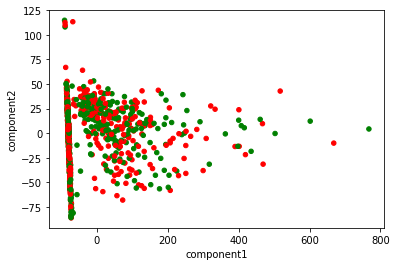

In [38]:
# Plot PCA results
colors = ['r', 'g']
pca_df.plot.scatter(x='component1', y='component2', c=colors)